## Khai báo thư viện, khởi tạo spark session

In [1]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
sparkSession = SparkSession.builder.appName("bigdata-car-price-prediction").getOrCreate()

## Đọc dữ liệu từ hdfs

In [2]:
df = sparkSession.read.csv('hdfs://172.17.0.2:9000/user/root/bigdata/oto2.csv', header=True)

In [3]:
df.printSchema()

root
 |-- Hãng: string (nullable = true)
 |-- Dòng: string (nullable = true)
 |-- Tên xe: string (nullable = true)
 |-- Thời gian: string (nullable = true)
 |-- Giá xe: string (nullable = true)
 |-- Xuất xứ: string (nullable = true)
 |-- Tình trạng: string (nullable = true)
 |-- Dòng xe: string (nullable = true)
 |-- Số Km đã đi: string (nullable = true)
 |-- Màu ngoại thất: string (nullable = true)
 |-- Màu nội thất: string (nullable = true)
 |-- Số cửa: string (nullable = true)
 |-- Động cơ: string (nullable = true)
 |-- Hộp số: string (nullable = true)
 |-- Dẫn động: string (nullable = true)
 |-- Số chỗ ngồi: string (nullable = true)
 |-- Hệ thống nạp nhiên liệu: string (nullable = true)
 |-- Tiêu thụ nhiên liệu: string (nullable = true)



### Vì các thuộc tính numeric của dữ liệu bị chuyển thành dạng string khi lấy dữ liệu bằng spark read csv nên cần chuyển đổi lại kiểu dữ liệu

In [4]:
df = df.withColumn('Thời gian', df['Thời gian'].cast('int'))
df = df.withColumn('Số cửa', df['Số cửa'].cast('int'))
df = df.withColumn('Số chỗ ngồi', df['Số chỗ ngồi'].cast('int'))
df.printSchema()

root
 |-- Hãng: string (nullable = true)
 |-- Dòng: string (nullable = true)
 |-- Tên xe: string (nullable = true)
 |-- Thời gian: integer (nullable = true)
 |-- Giá xe: string (nullable = true)
 |-- Xuất xứ: string (nullable = true)
 |-- Tình trạng: string (nullable = true)
 |-- Dòng xe: string (nullable = true)
 |-- Số Km đã đi: string (nullable = true)
 |-- Màu ngoại thất: string (nullable = true)
 |-- Màu nội thất: string (nullable = true)
 |-- Số cửa: integer (nullable = true)
 |-- Động cơ: string (nullable = true)
 |-- Hộp số: string (nullable = true)
 |-- Dẫn động: string (nullable = true)
 |-- Số chỗ ngồi: integer (nullable = true)
 |-- Hệ thống nạp nhiên liệu: string (nullable = true)
 |-- Tiêu thụ nhiên liệu: string (nullable = true)



In [5]:
df = df.toPandas()


In [26]:
df.shape

(28194, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hãng                     28680 non-null  object 
 1   Dòng                     28680 non-null  object 
 2   Tên xe                   28115 non-null  object 
 3   Thời gian                28587 non-null  float64
 4   Giá xe                   28680 non-null  object 
 5   Xuất xứ                  28680 non-null  object 
 6   Tình trạng               28680 non-null  object 
 7   Dòng xe                  28680 non-null  object 
 8   Số Km đã đi              28680 non-null  object 
 9   Màu ngoại thất           28680 non-null  object 
 10  Màu nội thất             28680 non-null  object 
 11  Số cửa                   28680 non-null  int32  
 12  Động cơ                  27608 non-null  object 
 13  Hộp số                   28680 non-null  object 
 14  Dẫn động              

In [7]:

feature = ["Dòng", "Thời gian", "Xuất xứ", "Tình trạng", "Màu ngoại thất", "Màu nội thất", "Số cửa", "Hộp số", "Số chỗ ngồi"]

# Phân tích dữ liệu


## Mô tả dữ liệu theo từng đặc trưng


In [8]:
df[feature].info()
for i in feature:
  print(df[i].describe())
  print("--------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dòng            28680 non-null  object 
 1   Thời gian       28587 non-null  float64
 2   Xuất xứ         28680 non-null  object 
 3   Tình trạng      28680 non-null  object 
 4   Màu ngoại thất  28680 non-null  object 
 5   Màu nội thất    28680 non-null  object 
 6   Số cửa          28680 non-null  int32  
 7   Hộp số          28680 non-null  object 
 8   Số chỗ ngồi     28680 non-null  int32  
dtypes: float64(1), int32(2), object(6)
memory usage: 1.8+ MB
count       28680
unique        448
top       Morning
freq         1405
Name: Dòng, dtype: object
--------------------
count    28587.000000
mean      2015.407913
std          5.487340
min       1990.000000
25%       2012.000000
50%       2018.000000
75%       2020.000000
max       2021.000000
Name: Thời gian, dtype: float64
--------

## Top 10 dòng xe được bán nhiều nhất

In [9]:
df_1 = df.groupby('Dòng')['Xuất xứ'].count().reset_index()
df_1 = df_1.sort_values(by=['Xuất xứ'])
df_1 = df_1.rename(columns = {'Xuất xứ':'Số lượng'})

df_1[-10:]

,Dòng,Số lượng
136,Everest,545
72,C class,582
13,3,629
81,Camry,644
159,Fortuner,644
443,i10,918
208,Innova,1016
325,Ranger,1143
406,Vios,1150
259,Morning,1405


Text(0, 0.5, 'Số lượng mỗi dòng xe')

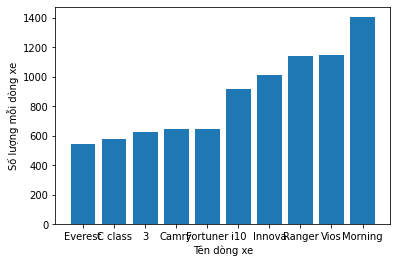

In [10]:
import matplotlib.pyplot as plt

plt.bar(x = df_1['Dòng'][-10:], height = df_1['Số lượng'][-10:])
plt.xlabel('Tên dòng xe')
plt.ylabel('Số lượng mỗi dòng xe')

## Xuất xứ của xe

Text(0.5, 1.0, 'Biểu đồ tròn tỷ lệ % của các nhóm')

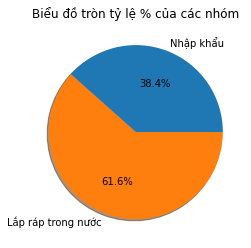

In [11]:
df_2 = df.groupby('Xuất xứ')['Thời gian'].count().reset_index()
df_2 = df_2.sort_values(by=['Thời gian'])

plt.pie(x = df_2['Thời gian'], labels = df_2['Xuất xứ'],autopct = '%1.1f%%', shadow = True)
plt.title('Biểu đồ tròn tỷ lệ % của các nhóm')


## Hộp số

Text(0.5, 1.0, 'Biểu đồ tròn tỷ lệ % của các nhóm')

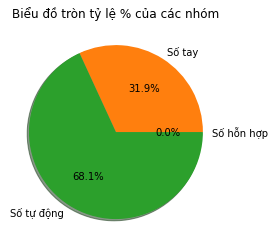

In [12]:
df_3 = df.groupby('Hộp số')['Thời gian'].count().reset_index()
df_3 = df_3.sort_values(by=['Thời gian'])

plt.pie(x = df_3['Thời gian'], labels = df_3['Hộp số'],autopct = '%1.1f%%', shadow = True)
plt.title('Biểu đồ tròn tỷ lệ % của các nhóm')

## Màu ngoại thất

Text(0, 0.5, 'Số lượng mỗi màu')

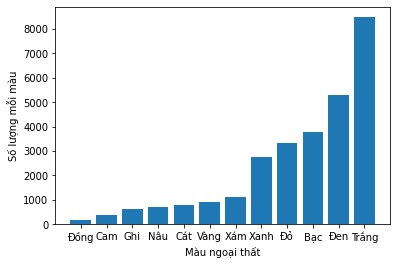

In [13]:
df_4 = df.groupby('Màu ngoại thất')['Thời gian'].count().reset_index()
df_4 = df_4.sort_values(by=['Thời gian'])

plt.bar(x = df_4['Màu ngoại thất'][5:], height = df_4['Thời gian'][5:])
plt.xlabel('Màu ngoại thất')
plt.ylabel('Số lượng mỗi màu')

# Tiền Xử lý dữ liệu




## Đưa Giá ô tô từ String về Number


In [14]:
import re
def stringToNumber1(s):
  tmp = re.split(' ', s)
  n = len(tmp)
  if n == 4:
    return 1000 * int(tmp[0]) + int(tmp[2])
  elif n == 2:
    if tmp[1] == 'Tỷ':
      return 1000 * int(tmp[0])
    elif tmp[1] == 'Triệu':
      return int(tmp[0])
    else:
      return 0
  else:
    return 0

print(df['Giá xe'][:10])

for i in range(len(df)):
  df['Giá xe'][i] = stringToNumber1(df['Giá xe'][i])

df['Giá xe'][:10]


0    1 Tỷ 390 Triệu
1         700 Triệu
2         630 Triệu
3         340 Triệu
4         630 Triệu
5         515 Triệu
6         668 Triệu
7         575 Triệu
8         620 Triệu
9    1 Tỷ 250 Triệu
Name: Giá xe, dtype: object


<ipython-input-14-6b9f69ab1f4b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Giá xe'][i] = stringToNumber1(df['Giá xe'][i])


0    1390
1     700
2     630
3     340
4     630
5     515
6     668
7     575
8     620
9    1250
Name: Giá xe, dtype: object

## Phân tích giá xe

In [32]:
print(df['Giá xe'].max())
print(df['Giá xe'].min())

39500
12


## Đưa thuộc tính số Km đã đi về Number

In [15]:
def stringToNumber2(s):
  tmp = re.findall('\d+', s)
  s1 = ''
  for i in tmp:
    s1 = s1 + i;
  return float(s1)

print(df['Số Km đã đi'].describe())

for i in range(len(df)):
  df['Số Km đã đi'][i] = stringToNumber2(df['Số Km đã đi'][i])

print(df['Số Km đã đi'].describe())

count     28680
unique     1621
top           0
freq      16759
Name: Số Km đã đi, dtype: object


<ipython-input-15-6f164fde8f66>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Số Km đã đi'][i] = stringToNumber2(df['Số Km đã đi'][i])


count     28680.0
unique     1621.0
top           0.0
freq      16759.0
Name: Số Km đã đi, dtype: float64


##  Lọc nhiễu
### Một số dòng xe chỉ có một vài mẫu cần loại bỏ để tránh gây nhiễu

In [16]:
print(df_1.shape)
print(df_1[:200])

for tmp in df_1['Dòng'][:200]:
  df = df.drop(df[df['Dòng'] == tmp].index)

print(df.shape)

df['Dòng'].describe()

(448, 2)
           Dòng  Số lượng
447        khác         1
368      Tacoma         1
369          Tc         1
189    Grandeur         1
372      Tercel         1
..          ...       ...
179     GentraX         6
432   XJ series         6
146         FVR         6
17         300C         6
15   300 Series         6

[200 rows x 2 columns]
(28194, 18)


count       28194
unique        248
top       Morning
freq         1405
Name: Dòng, dtype: object

## Xử lý missing data
Nhận thấy trường 'Thời gian' có giá trị null cần phải xử lý. Phương pháp sẽ là thay các giá trị null bằng giá trị trung bình.

In [17]:
data_x = df[feature]
data_y = df['Giá xe']

data_x.info()
print('---------------------------------')


tb = data_x['Thời gian'].mean()

data_x['Thời gian'] = data_x['Thời gian'].fillna(int(tb))

data_x.info()
print('---------------------------------')

print(data_x['Thời gian'].describe())
print('---------------------------------')

data_x['Thời gian'] -= 1980
print(data_x['Thời gian'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28194 entries, 0 to 28678
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dòng            28194 non-null  object 
 1   Thời gian       28113 non-null  float64
 2   Xuất xứ         28194 non-null  object 
 3   Tình trạng      28194 non-null  object 
 4   Màu ngoại thất  28194 non-null  object 
 5   Màu nội thất    28194 non-null  object 
 6   Số cửa          28194 non-null  int32  
 7   Hộp số          28194 non-null  object 
 8   Số chỗ ngồi     28194 non-null  int32  
dtypes: float64(1), int32(2), object(6)
memory usage: 1.9+ MB
---------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28194 entries, 0 to 28678
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dòng            28194 non-null  object 
 1   Thời gian       28194 non-null  float64
 2   Xuất xứ 

<ipython-input-17-c08e72915a0c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['Thời gian'] = data_x['Thời gian'].fillna(int(tb))
<ipython-input-17-c08e72915a0c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['Thời gian'] -= 1980


In [18]:
data_x.shape
data_x.columns

Index(['Dòng', 'Thời gian', 'Xuất xứ', 'Tình trạng', 'Màu ngoại thất',
       'Màu nội thất', 'Số cửa', 'Hộp số', 'Số chỗ ngồi'],
      dtype='object')

## Mã hóa các trường có giá trị rời rạc về dạng one-hot-vector


In [19]:
data_x = pd.get_dummies(data_x, dummy_na=True)
print(data_x.shape)
data_x.columns


(28194, 299)


Index(['Thời gian', 'Số cửa', 'Số chỗ ngồi', 'Dòng_1 Series', 'Dòng_2',
       'Dòng_2 Series', 'Dòng_208', 'Dòng_3', 'Dòng_3 Series', 'Dòng_3008',
       ...
       'Màu nội thất_Xanh', 'Màu nội thất_Xám', 'Màu nội thất_Đen',
       'Màu nội thất_Đỏ', 'Màu nội thất_Đồng', 'Màu nội thất_nan',
       'Hộp số_Số hỗn hợp', 'Hộp số_Số tay', 'Hộp số_Số tự động',
       'Hộp số_nan'],
      dtype='object', length=299)

## Chuẩn hóa dữ liệu
Chuẩn hóa các đặc trưng số học về Mean Normalization

In [20]:
numeric_features = ['Thời gian','Số cửa', 'Số chỗ ngồi']

x_min = data_x[numeric_features].min() 
x_max = data_x[numeric_features].max()  

data_x[numeric_features] = (data_x[numeric_features] - x_min)/(x_max - x_min)

for i in numeric_features:
  print(data_x[i].describe())

count    28194.000000
mean         0.822316
std          0.174344
min          0.000000
25%          0.741935
50%          0.903226
75%          0.967742
max          1.000000
Name: Thời gian, dtype: float64
count    28194.000000
mean         0.064686
std          0.016328
min          0.000000
25%          0.056604
50%          0.075472
75%          0.075472
max          1.000000
Name: Số cửa, dtype: float64
count    28194.000000
mean         0.068306
std          0.039828
min          0.000000
25%          0.057143
50%          0.057143
75%          0.085714
max          1.000000
Name: Số chỗ ngồi, dtype: float64


## Chia dữ liệu thành 2 tập train và test

In [21]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state = 41)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)      

(22555, 299)
(5639, 299)
(22555,)
(5639,)


# Huấn luyện 

## Đưa dữ liệu về dạng ma trận để áp dụng mô hình Linear Regression

In [22]:
import numpy as np 

n1 = len(train_x)
one1 = np.ones((n1,1))
X1 = np.array(train_x)
Xbar_train = np.hstack((one1, X1))

n2 = len(test_x)
one2 = np.ones((n2,1))
X2 = np.array(test_x)
Xbar_test = np.hstack((one2, X2))
y_train = np.array(train_y).T

print(Xbar_train.shape)
print(Xbar_test.shape)
print(y_train.shape)

(22555, 300)
(5639, 300)
(22555,)


## Tính trọng số W*

In [23]:
d = train_x.shape[1]+1

A = np.dot(Xbar_train.T, Xbar_train)
b = np.dot(Xbar_train.T, train_y)
w = np.dot(np.linalg.pinv(A), b).reshape((d, 1))

w.shape

(300, 1)

## Áp dụng dự đoán với tập test và đánh giá kết quả
Kết quả tương đối tốt với trung bình lỗi khoảng 15%

In [24]:
pred_y = np.abs(np.dot(Xbar_test, w).reshape(n2))
test_y = np.array(test_y).reshape(n2)

df2 = pd.DataFrame()
df2['Giá xe'] = test_y
df2['Giá dự đoán'] = pred_y
df2['error'] = np.abs(test_y - pred_y)/
df2['error_percent'] = np.abs(test_y - pred_y)/test_y

df2.to_csv("~/Downloads/car_price_prediction.csv")

In [25]:
print(df2['error'].mean())
print(df2['error_percent'].mean())

76.64115080365416
0.14703978924956118
